<a href="https://colab.research.google.com/github/pushkal1234/HSE_Competitive-Data-Science/blob/main/DrugsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the data

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# getting the shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (32165, 8)
Shape of test : (10760, 7)


In [ ]:
# reading the data

train = pd.read_csv('drive/My Drive/Projects/practice/Drugs/drugsComTrain_raw.csv')
test = pd.read_csv('drive/My Drive/Projects/practice/Drugs/drugsComTest_raw.csv')

# getting the shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

In [ ]:
train

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782
...,...,...,...,...,...,...,...,...
32160,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
32161,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076
32162,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,6.241812
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,7.940428


In [ ]:
test

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2
...,...,...,...,...,...,...,...
10755,151266,Chantix,"""I took chantix a little over a month. It made...",11-Nov-17,2,Smoking Cessation,1
10756,139347,Armodafinil,"""This medicine kept me from sleeping the whole...",30-Sep-14,18,Narcolepsy,1
10757,159999,Tamoxifen,"""I have taken Tamoxifen for 5 years. Side effe...",13-Sep-14,43,"Breast Cancer, Prevention",10
10758,130945,Levonorgestrel,"""I&#039;m married, 34 years old and I have no ...",15-Nov-10,7,Birth Control,8


In [ ]:
#  checking the head of the train

train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
# checking the head of the test

test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
# as both the dataset contains same columns we can combine them for better analysis

data = pd.concat([train, test])

# checking the shape
data.shape

(42925, 8)

In [ ]:
data

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782
...,...,...,...,...,...,...,...,...
10755,151266,Chantix,Smoking Cessation,"""I took chantix a little over a month. It made...",1,11-Nov-17,2,NaN
10756,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18,NaN
10757,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,NaN
10758,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,NaN


In [ ]:
# checing the sample of new dataset

data.sample(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
8337,212855,Sofosbuvir / velpatasvir,Hepatitis C,"""Side effects, mild, but tired. Take a lot of ...",9,12-Mar-17,19,NaN
25633,10106,Lo Loestrin Fe,Birth Control,"""I was worried about starting birth control. I...",9,17-Dec-11,16,8.805914
16578,122480,Linaclotide,"Constipation, Chronic","""This medication has been a great for me. I ta...",10,23-Mar-17,55,7.521367
8729,124654,Irbesartan,High Blood Pressure,"""Controls blood pressure great, but having sid...",8,24-Sep-14,79,NaN
23810,67882,Plan B,Emergency Contraception,"""My boyfriend and I had sex 4 days after my pe...",10,25-Jul-16,3,8.745991


In [ ]:
# describing the data

data.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,42925.000000,42925.000000,42925.000000,32165.000000
mean,115745.103180,6.990099,27.818707,6.664261
std,67082.549175,3.274993,35.383755,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,57263.000000,5.000000,6.000000,6.109307
50%,115978.000000,8.000000,16.000000,6.788245
75%,173705.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


In [ ]:
# taking out information from the data

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42925 entries, 0 to 10759
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  42925 non-null  int64  
 1   name_of_drug                42925 non-null  object 
 2   use_case_for_drug           42925 non-null  object 
 3   review_by_patient           42925 non-null  object 
 4   effectiveness_rating        42925 non-null  int64  
 5   drug_approved_by_UIC        42925 non-null  object 
 6   number_of_times_prescribed  42925 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.9+ MB


In [ ]:
# checking if the data contains any NULL values

data.isnull().any()

patient_id                    False
name_of_drug                  False
use_case_for_drug             False
review_by_patient             False
effectiveness_rating          False
drug_approved_by_UIC          False
number_of_times_prescribed    False
base_score                     True
dtype: bool

# Statistical Visualization using Seaborn and Matplotlib and wordcloud

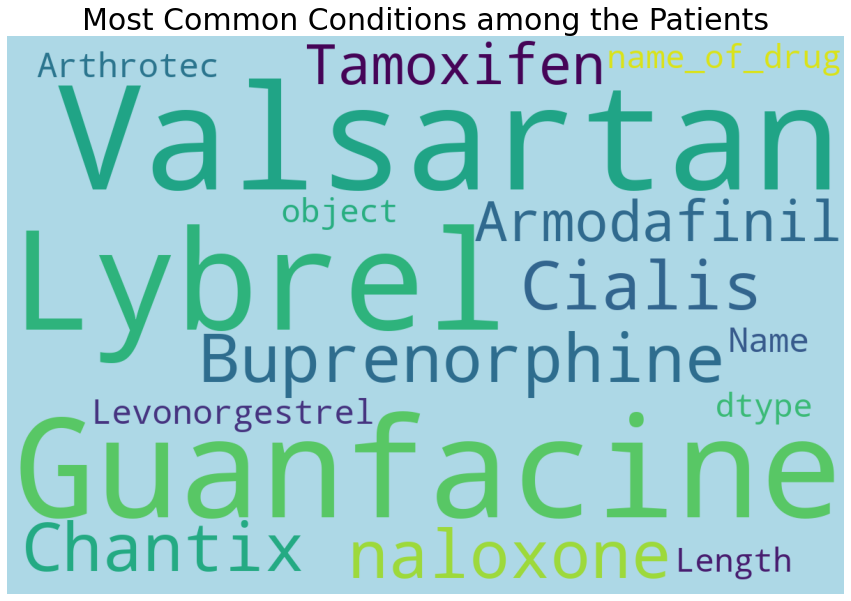

In [ ]:
# most common condition

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(data['name_of_drug']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

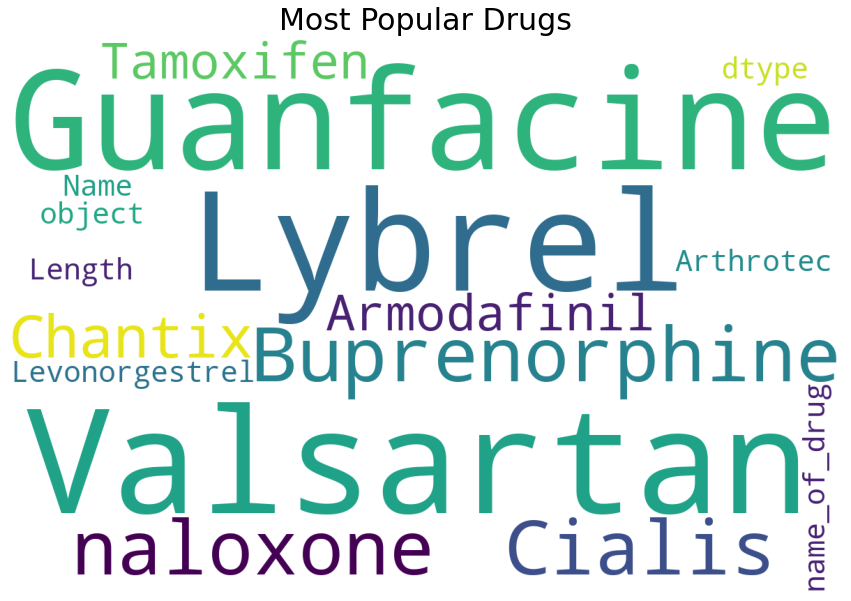

In [ ]:
# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(data['name_of_drug']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

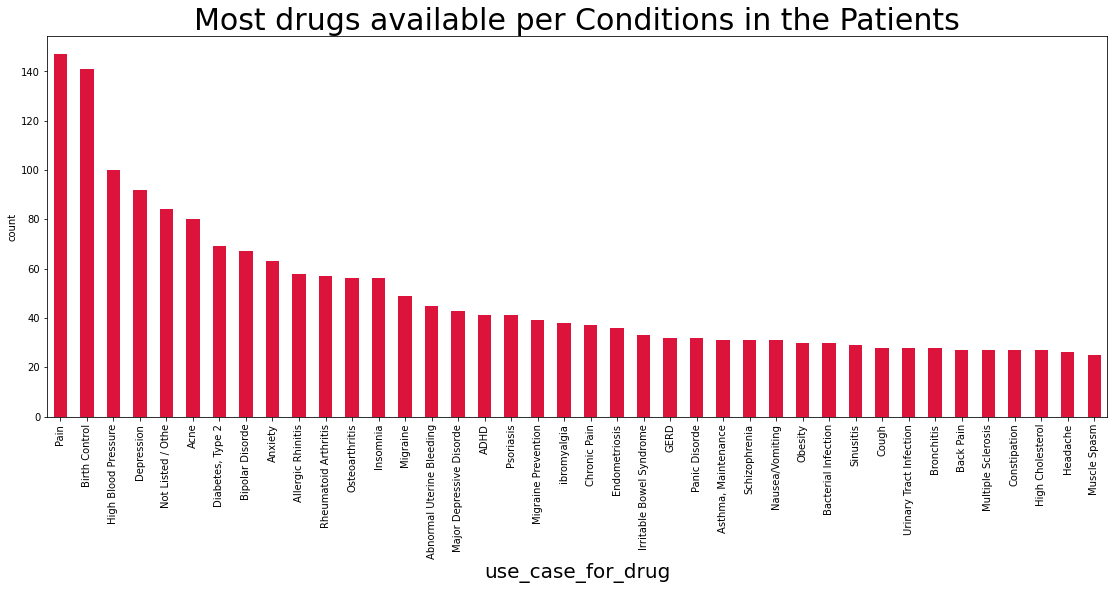

In [ ]:
# checking the most popular drugs per conditions

data.groupby(['use_case_for_drug'])['name_of_drug'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'crimson')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('use_case_for_drug', fontsize = 20)
plt.ylabel('count')
plt.show()

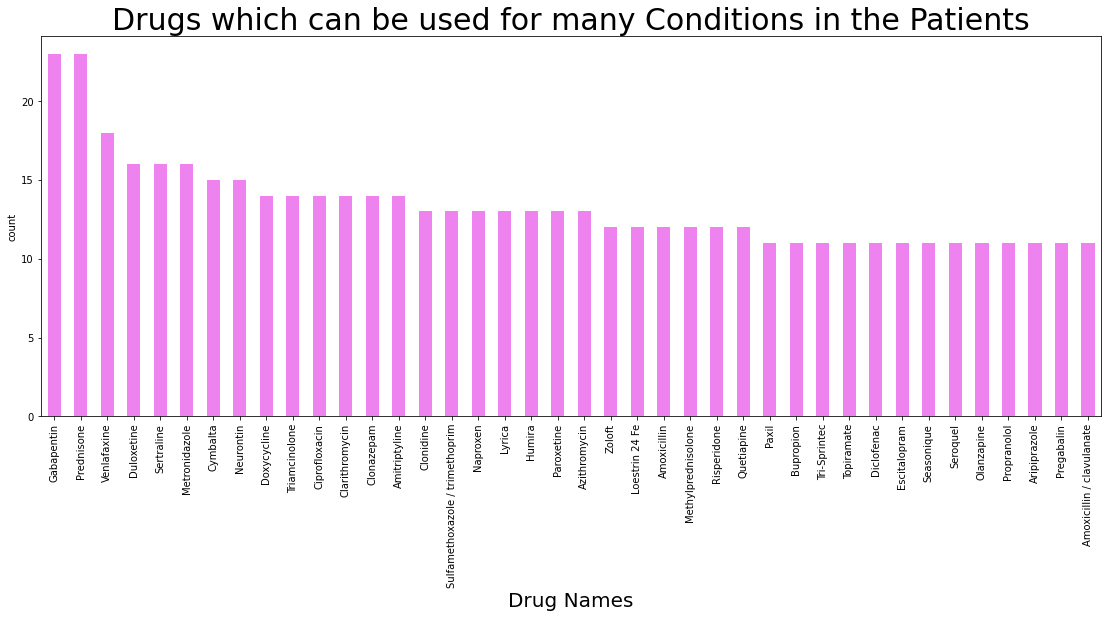

In [ ]:
# checking the most popular drugs per conditions

data.groupby(['name_of_drug'])['use_case_for_drug'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'violet')
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()

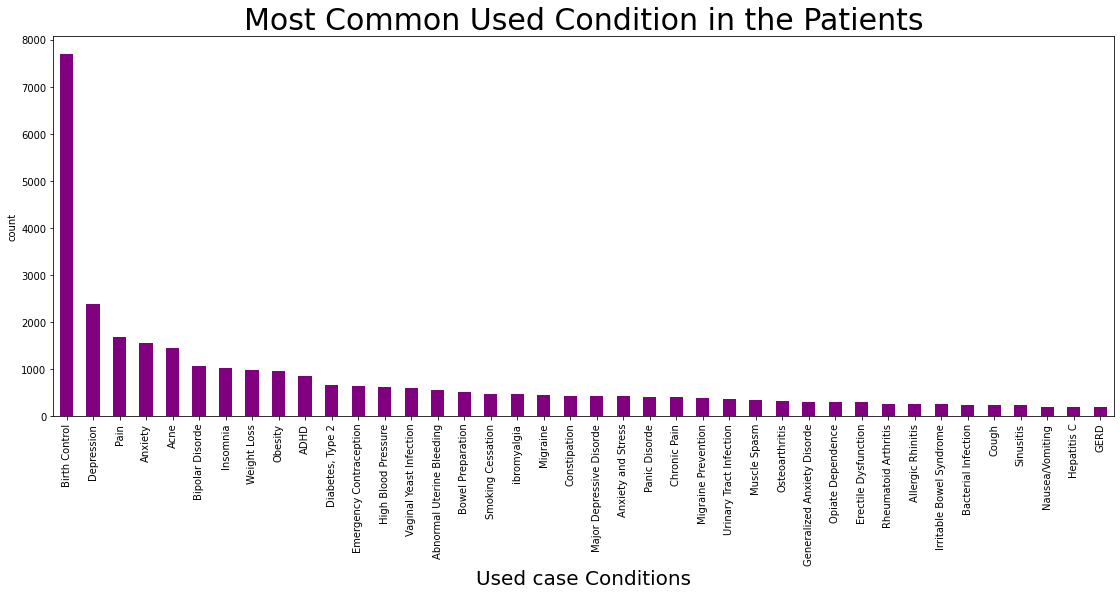

In [ ]:
# checking the different types of conditions patients


data['use_case_for_drug'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Used Condition in the Patients', fontsize = 30)
plt.xlabel('Used case Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

In [ ]:
# let's read some reviews

train['review_by_patient'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

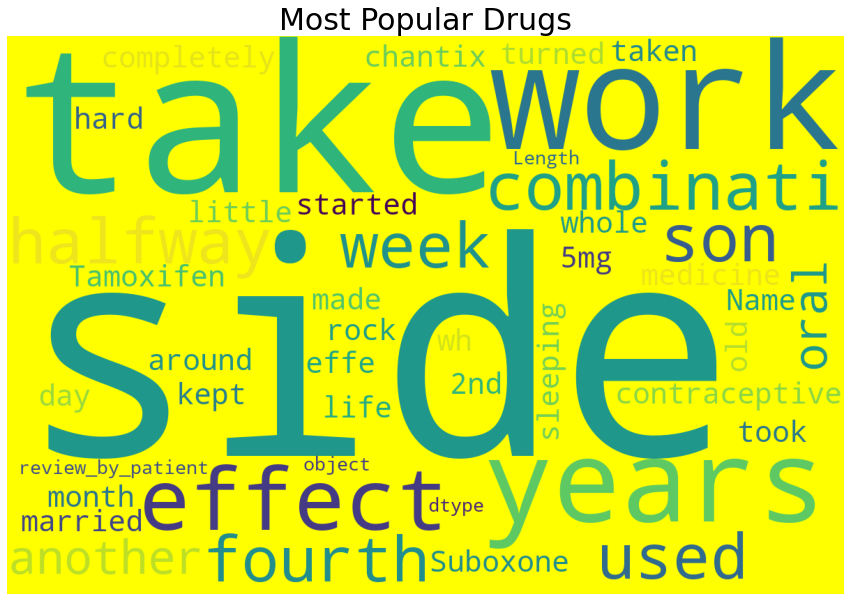

In [ ]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review_by_patient']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
data['effectiveness_rating'].value_counts()

10    13603
9      7297
1      5734
8      5013
7      2442
5      2146
2      1885
3      1721
6      1708
4      1376
Name: effectiveness_rating, dtype: int64

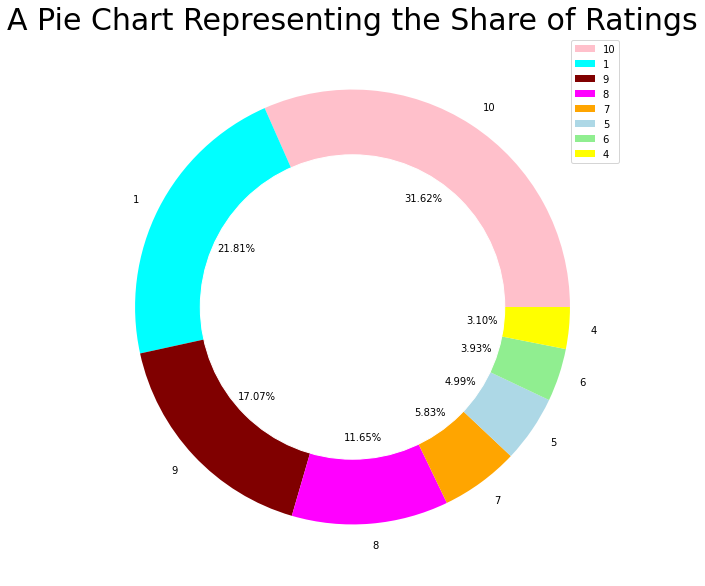

In [ ]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['effectiveness_rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['effectiveness_rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    32209
0.0    10716
Name: Review_Sentiment, dtype: int64

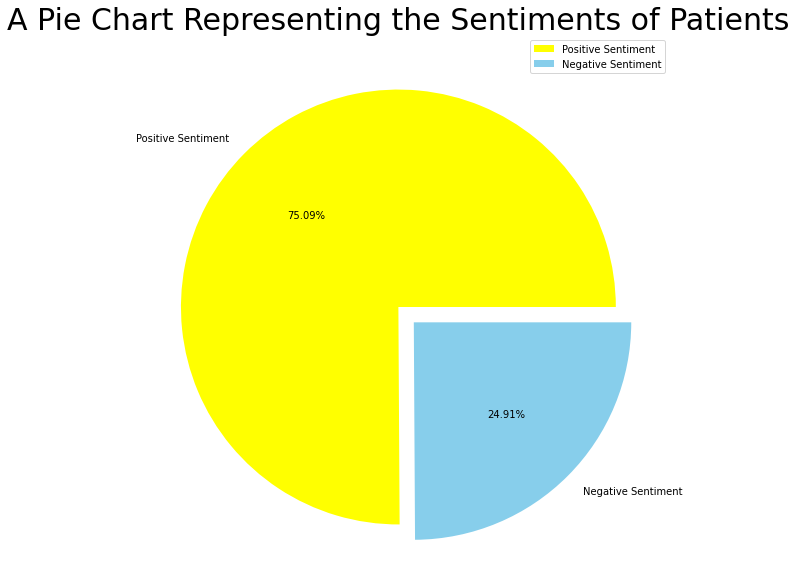

In [ ]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

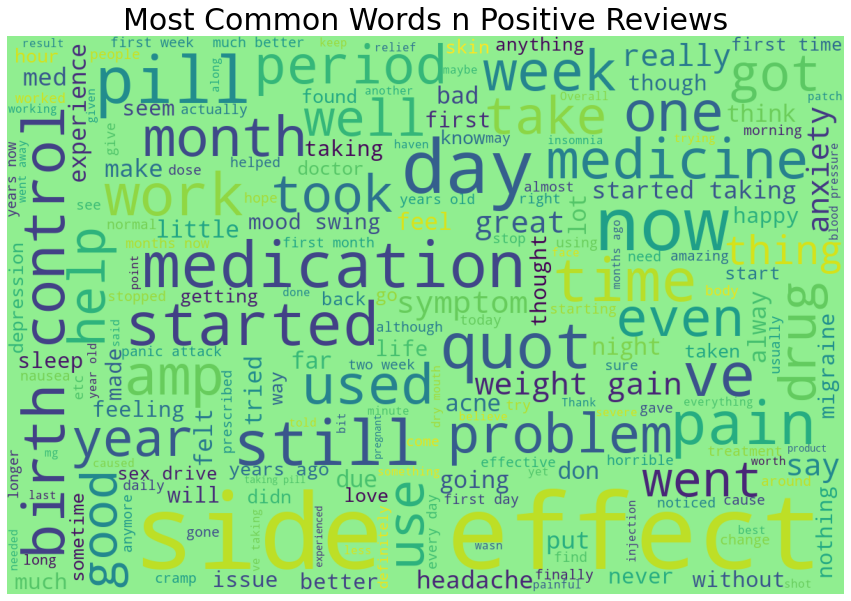

In [ ]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review_by_patient'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words n Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

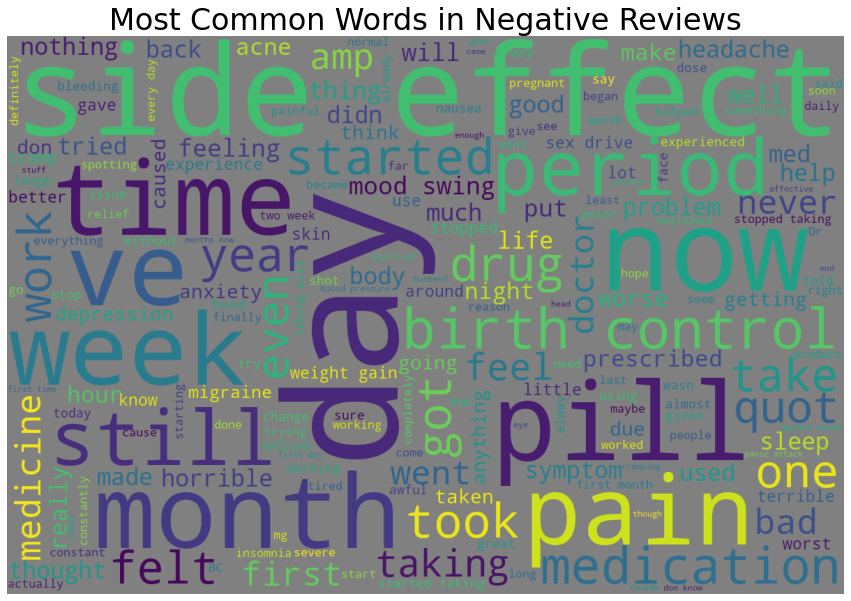

In [ ]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review_by_patient'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'grey', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:

# converting the date into datetime format
data['drug_approved_by_UIC'] = pd.to_datetime(data['drug_approved_by_UIC'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['drug_approved_by_UIC'].dt.year

# extracting the month from the date
data['month'] = data['drug_approved_by_UIC'].dt.month

# extracting the days from the date
data['day'] = data['drug_approved_by_UIC'].dt.day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


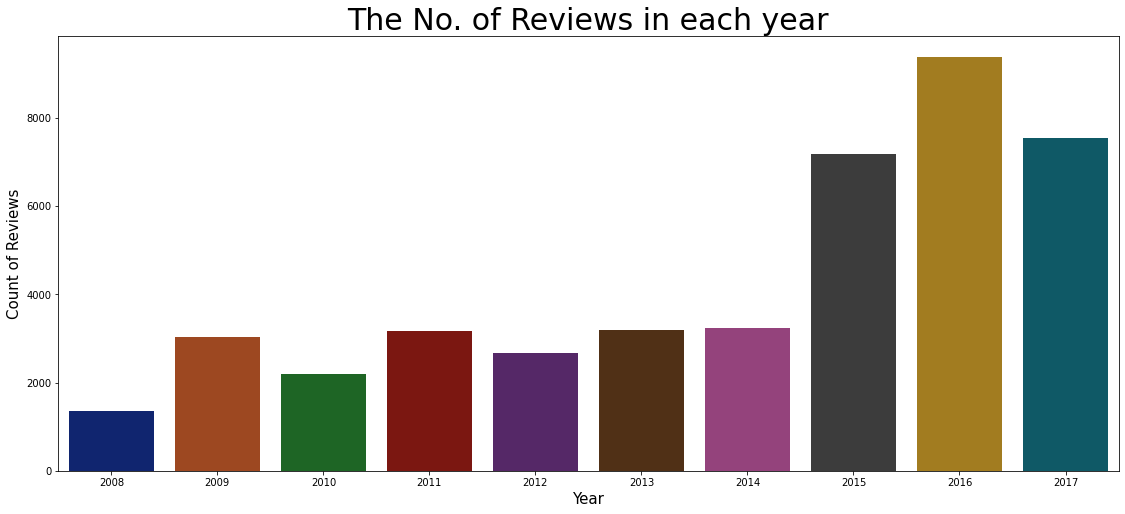

In [ ]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['Year'], palette ='dark')
plt.title('The No. of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

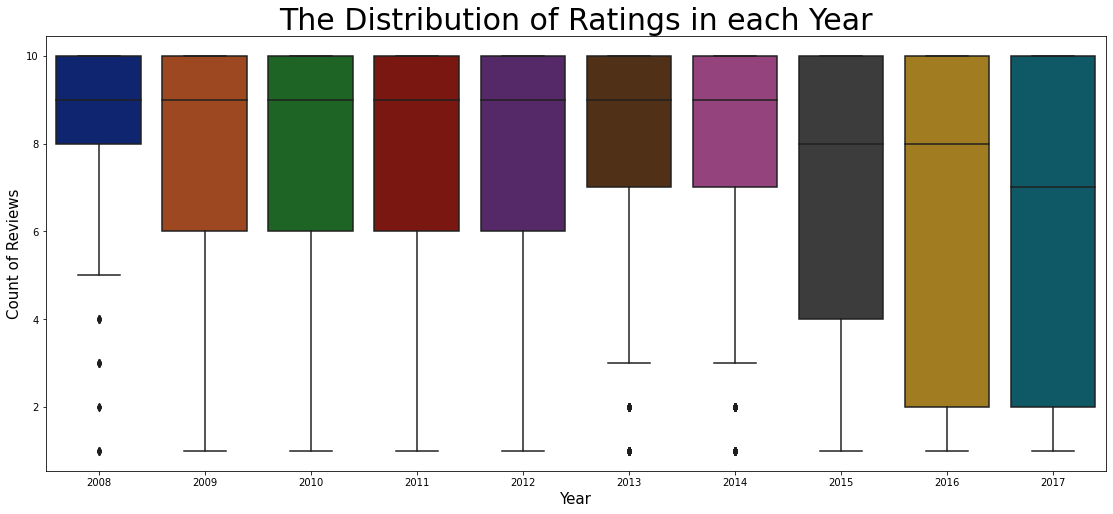

In [ ]:
# looking at the no. of ratings in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.boxplot(x = data['Year'], y = data['effectiveness_rating'], palette ='dark')
plt.title('The Distribution of Ratings in each Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

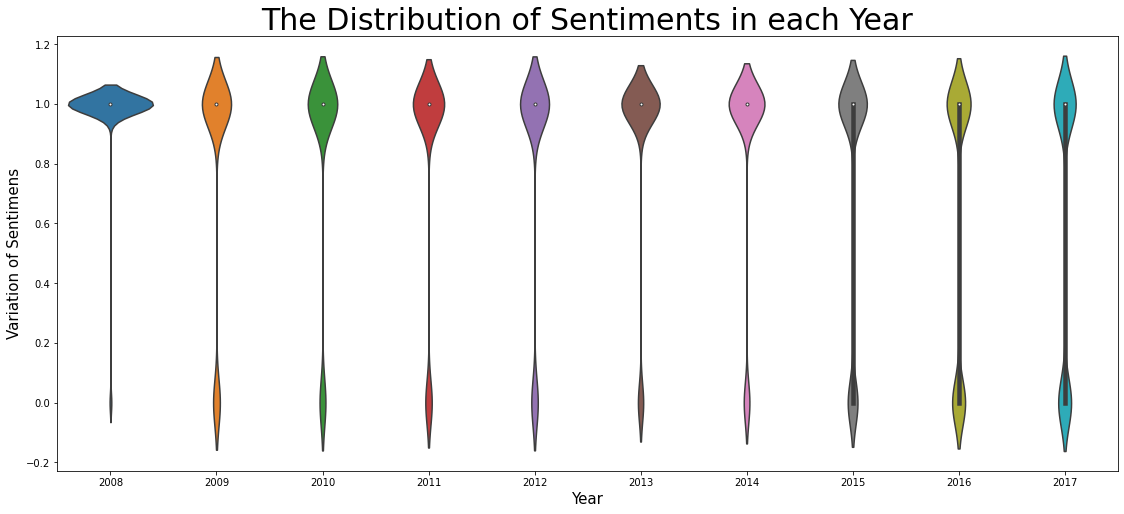

In [ ]:
# looking at the no. of ratings in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.violinplot(x = data['Year'], y = data['Review_Sentiment'])
plt.title('The Distribution of Sentiments in each Year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Variation of Sentimens', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


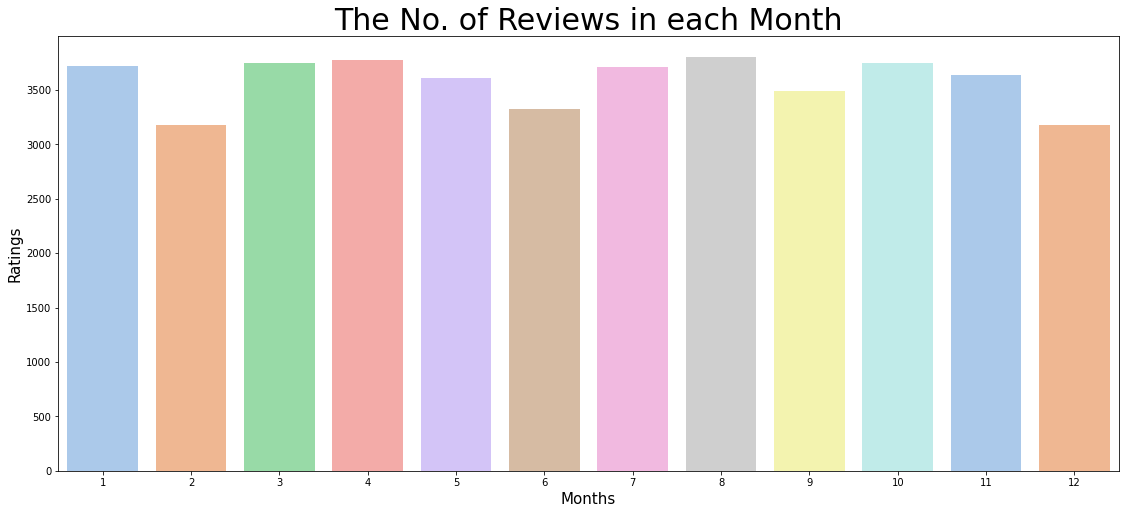

In [ ]:
# looking at the no. of reviews in each of the months

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['month'], palette ='pastel')
plt.title('The No. of Reviews in each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

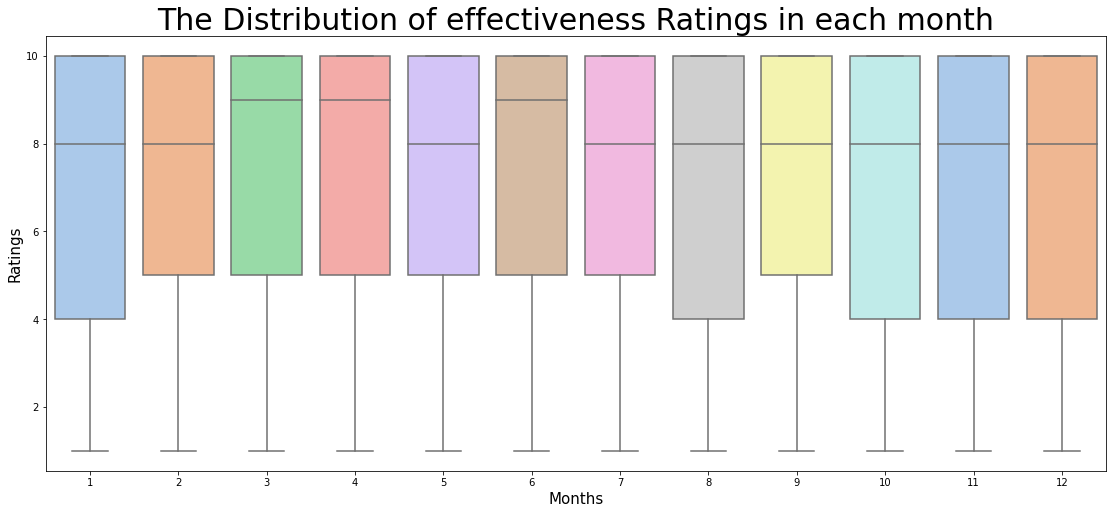

In [ ]:
# looking at the no. of ratings in each of the month

plt.rcParams['figure.figsize'] = (19, 8)
sns.boxplot(x = data['month'], y = data['effectiveness_rating'], palette ='pastel')
plt.title('The Distribution of effectiveness Ratings in each month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

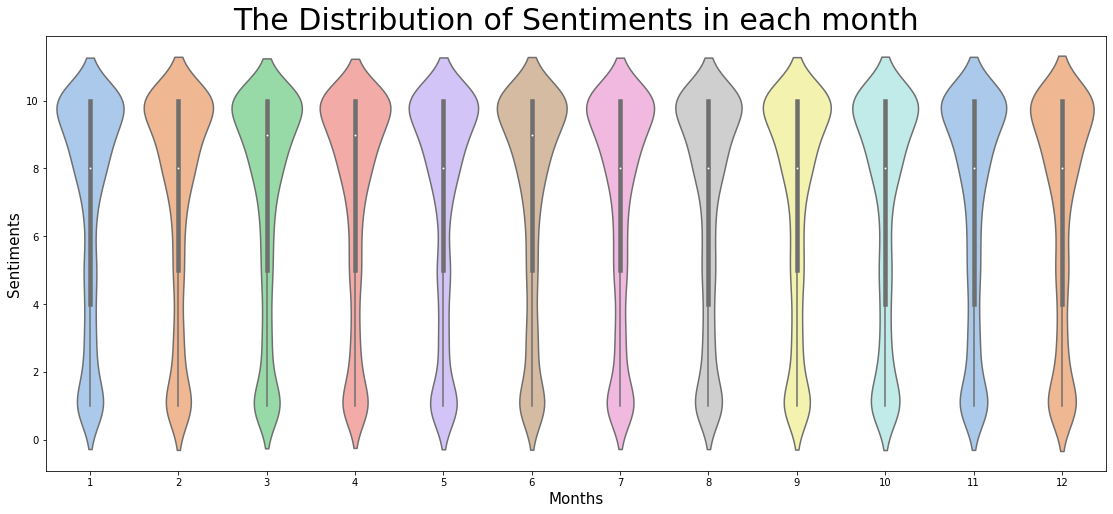

In [ ]:
# looking at the no. of ratings in each of the month

plt.rcParams['figure.figsize'] = (19, 8)
sns.violinplot(x = data['month'], y = data['effectiveness_rating'], palette ='pastel')
plt.title('The Distribution of Sentiments in each month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Sentiments', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


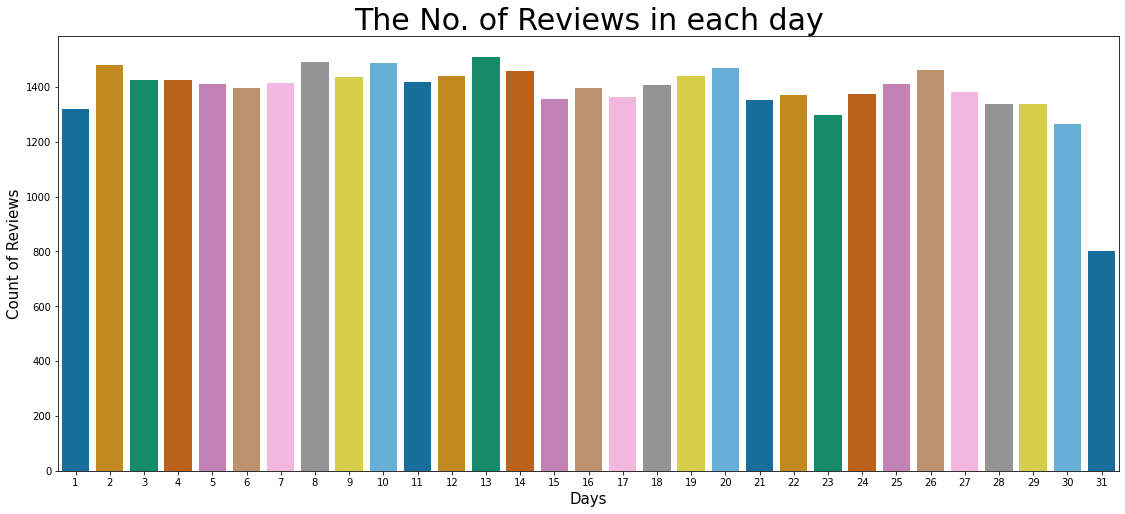

In [ ]:
# looking at the no. of reviews in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['day'], palette ='colorblind')
plt.title('The No. of Reviews in each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

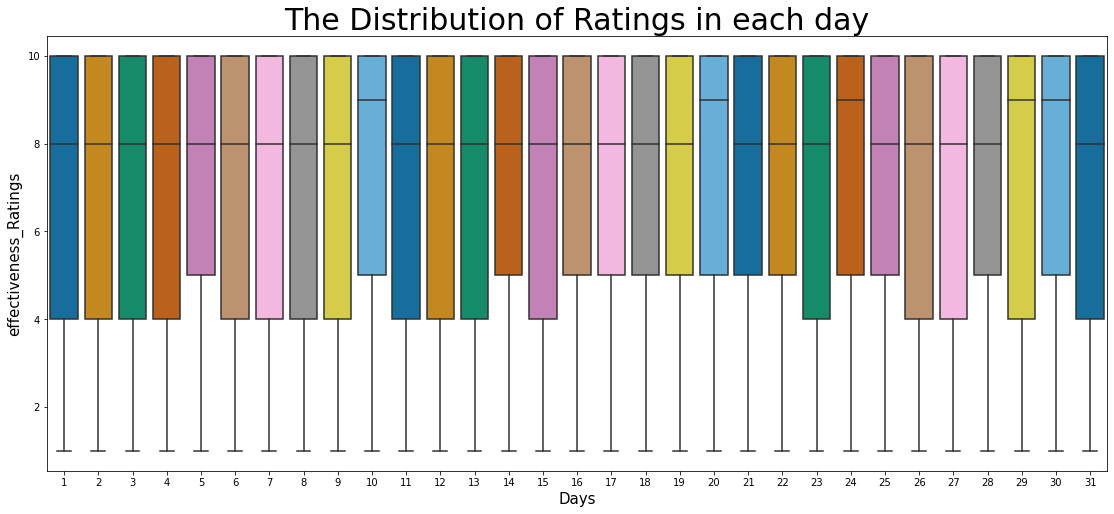

In [ ]:
# looking at the no. of ratings in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.boxplot(x = data['day'], y = data['effectiveness_rating'], palette ='colorblind')
plt.title('The Distribution of Ratings in each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('effectiveness_Ratings', fontsize = 15)
plt.show()

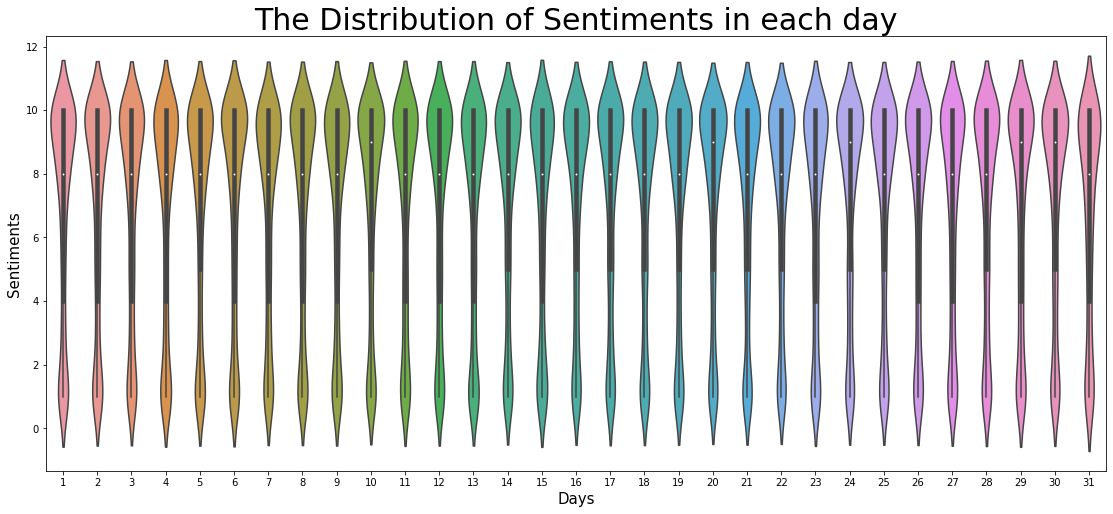

In [ ]:
# looking at the no. of ratings in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.violinplot(x = data['day'], y = data['effectiveness_rating'])
plt.title('The Distribution of Sentiments in each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Sentiments', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


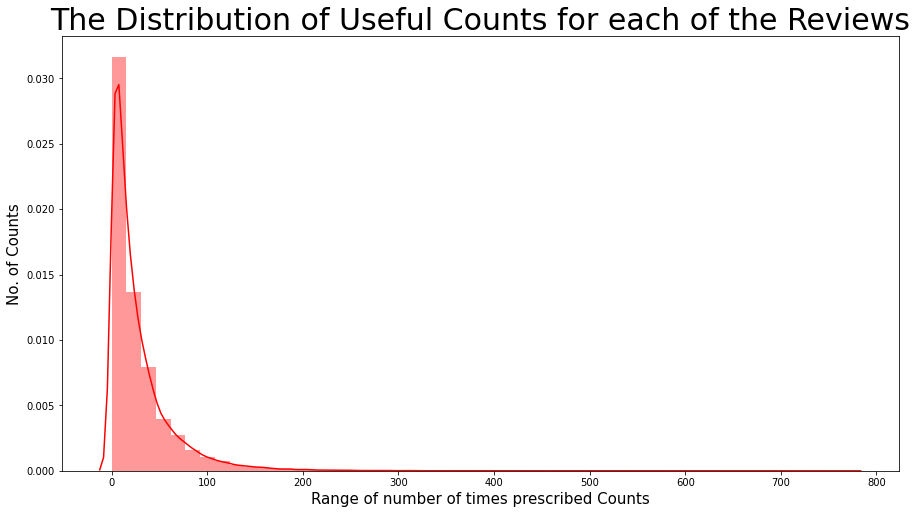

In [ ]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['number_of_times_prescribed'], color = 'red')
plt.title('The Distribution of Useful Counts for each of the Reviews', fontsize = 30)
plt.xlabel('Range of number of times prescribed Counts', fontsize = 15)
plt.ylabel('No. of Counts', fontsize = 15)
plt.show()

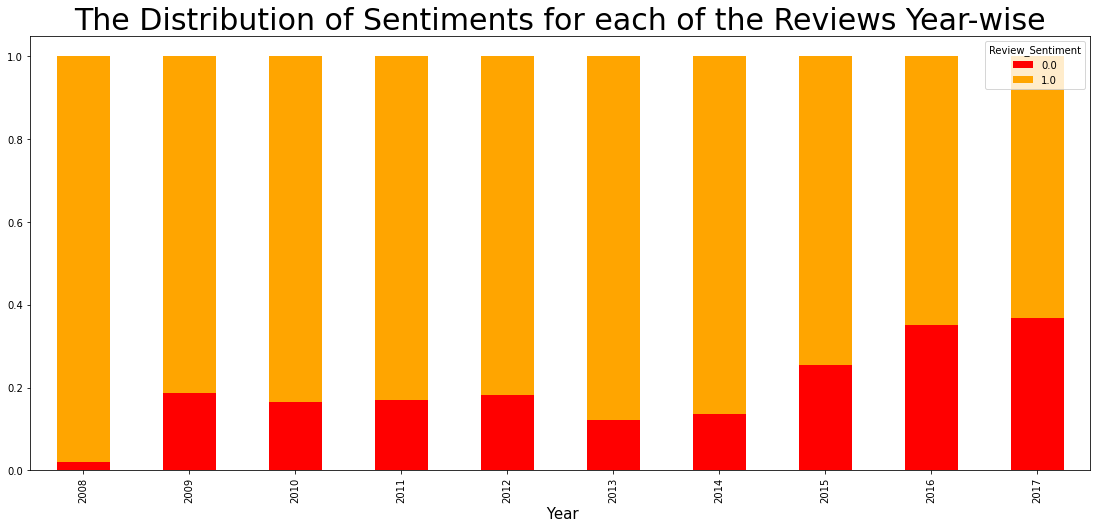

In [ ]:
# plotting a stacked bar to see in which year what were the sentiments

df = pd.crosstab(data['Year'] ,data['Review_Sentiment'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (19, 8), color = ['red', 'orange', 'pink'])
plt.title('The Distribution of Sentiments for each of the Reviews Year-wise', fontsize = 30)
plt.xlabel(' Year', fontsize = 15)
plt.show()

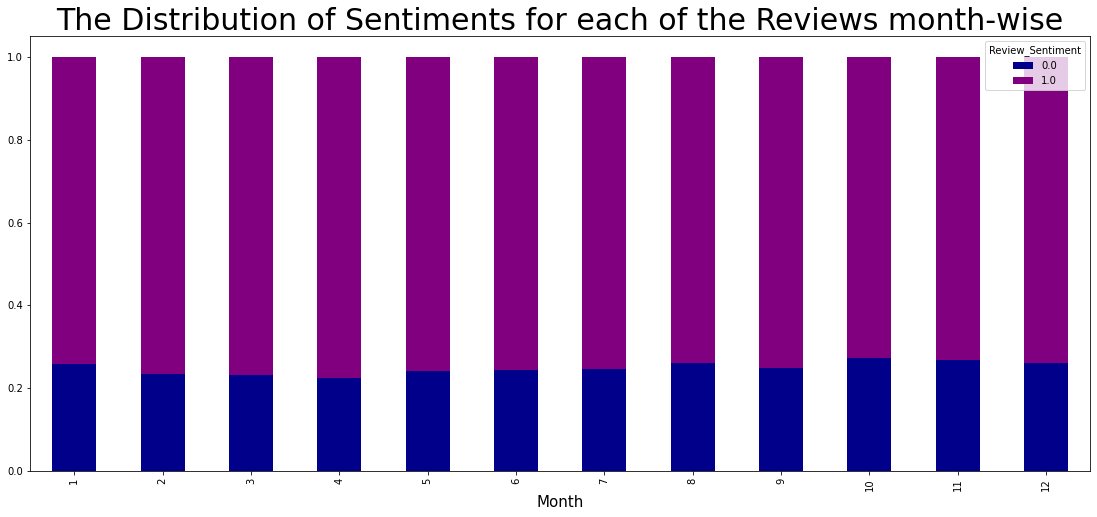

In [ ]:
# plotting a stacked bar to see in which year what were the sentiments

df = pd.crosstab(data['month'] ,data['Review_Sentiment'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (19, 8), color = ['darkblue', 'purple', 'violet'])
plt.title('The Distribution of Sentiments for each of the Reviews month-wise', fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.show()

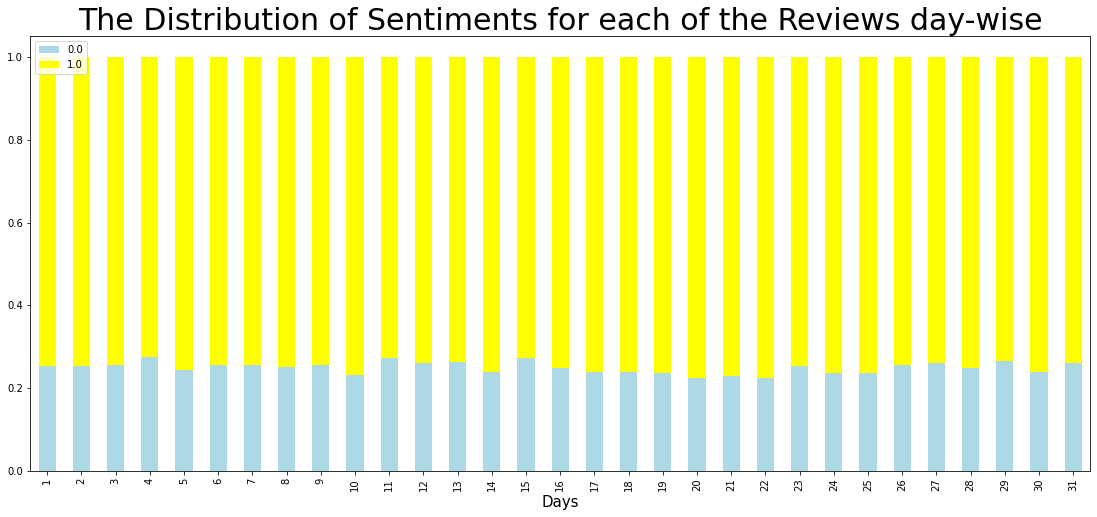

In [ ]:
# plotting a stacked bar to see in which year what were the sentiments

df = pd.crosstab(data['day'] ,data['Review_Sentiment'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (19, 8), color = ['lightblue', 'yellow', 'lightgreen'])
plt.title('The Distribution of Sentiments for each of the Reviews day-wise', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.legend(loc = 2)
plt.show()

In [ ]:
data['use_case_for_drug'].isnull().sum()

0

In [ ]:
# we will delete the rows so that the data does not overfits 

data = data.dropna(axis = 0)

# checking the new shape of the data
data.shape

(32165, 12)

In [ ]:
# importing the important libraries 

import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# removing some stopwords from the list of stopwords as they are important for drug recommendation

stops = set(stopwords.words('english'))

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't",
            "mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

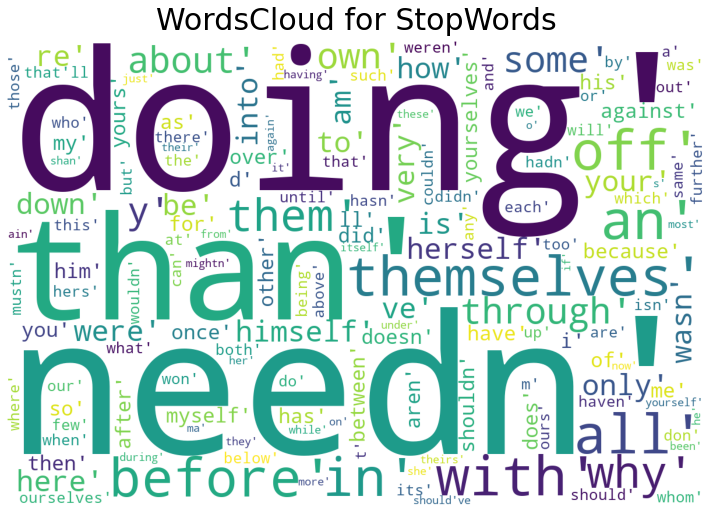

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, max_words = 200, figure_size=(10, 10), title = None, title_size = 30, image_color = None):
  
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words, 
                    random_state = 42,
                    width = 1200, 
                    height = 800,)
    wordcloud.generate(str(text))
   
    plt.figure(figsize = figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(stops, title="WordsCloud for StopWords")

In [ ]:
data['review_by_patient'].head(10)

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "Suboxone has completely turned my life around...
4    "2nd day on 5mg started to work with rock hard...
5    "I had been on the pill for many years. When m...
6    "I have taken anti-depressants for years, with...
7    "I&#039;ve been taking amitriptyline since Jan...
8    "I&#039;ve been on every medicine under the su...
9    "Spring of 2008 I was hospitalized with pnuemo...
Name: review_by_patient, dtype: object

In [ ]:
data.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'Review_Sentiment', 'Year',
       'month', 'day'],
      dtype='object')

In [ ]:
df_condition = data.groupby(['use_case_for_drug'])['name_of_drug'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)

,use_case_for_drug,name_of_drug
616,Costochondritis,1
617,Lactation Augmentation,1
618,"Tuberculosis, Latent",1
619,Turner's Syndrome,1
620,Leukemia,1
621,Leukocytoclastic Vasculitis,1
622,Lewy Body Dementia,1
623,Lichen Planus,1
624,Ulcerative Proctitis,1
625,Undifferentiated Connective Tissue Disease,1


In [ ]:

# setting a df with conditions with only one drug
df_condition_1 = df_condition[df_condition['name_of_drug'] == 1].reset_index()

all_list = set(data.index)

# deleting them
condition_list = []
for i,j in enumerate(data['use_case_for_drug']):
    for c in list(df_condition_1['use_case_for_drug']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
data = data.iloc[list(new_idx)].reset_index()
del data['index']

In [ ]:
# removing the conditions with <span> in it.

all_list = set(data.index)
span_list = []
for i,j in enumerate(data['use_case_for_drug']):
    if '</span>' in j:
        span_list.append(i)
new_idx = all_list.difference(set(span_list))
data = data.iloc[list(new_idx)].reset_index()
del data['index']

In [ ]:
data.shape

(31709, 12)

In [ ]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [ ]:
%time data['review_clean'] = data['review_by_patient'].apply(review_to_words)

CPU times: user 26 s, sys: 282 ms, total: 26.2 s
Wall time: 26.2 s


In [ ]:
data.columns


Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'Review_Sentiment', 'Year',
       'month', 'day', 'review_clean'],
      dtype='object')

In [ ]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size = 0.25, random_state = 0)

# checking the shape 
print("Shape of train:", df_train.shape)
print("Shape of test: ", df_test.shape)

Shape of train: (23781, 13)
Shape of test:  (7928, 13)


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

cv = CountVectorizer(max_features = 20000, ngram_range = (4, 4))
pipeline = Pipeline([('vect',cv)])

df_train_features = pipeline.fit_transform(df_train['review_clean'])
df_test_features = pipeline.fit_transform(df_test['review_clean'])

print("df_train_features :", df_train_features.shape)
print("df_test_features :", df_test_features.shape)

df_train_features : (23781, 20000)
df_test_features : (7928, 20000)


In [ ]:
# importing the libraries for deep learning model

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# making our dependent variable

y_train = df_train['Review_Sentiment']
y_test = df_test['Review_Sentiment']
solution = y_test.copy()

# Model Structure
model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape=(20000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

#  Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               4000200   
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               60300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0

In [ ]:
# 4. Train model
hist = model.fit(df_train_features, y_train, epochs=10, batch_size=64)

# 5. Traing process
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
sub_preds_deep = model.predict(df_test_features,batch_size=32)

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

#folds = KFold(n_splits=5, shuffle=True, random_state=546789)
target = df_train['Review_Sentiment']
feats = ['number_of_times_prescribed']

sub_preds = np.zeros(df_test.shape[0])

trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42) 
feature_importance_df = pd.DataFrame() 
    
clf = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.05,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        verbose=100, early_stopping_rounds=100  #30
    )

sub_preds = clf.predict(df_test[feats])
        
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.527212	valid_1's binary_logloss: 0.529614
[200]	training's binary_logloss: 0.527006	valid_1's binary_logloss: 0.529613
Early stopping, best iteration is:
[149]	training's binary_logloss: 0.527068	valid_1's binary_logloss: 0.52959


In [ ]:
solution = df_test['Review_Sentiment']
confusion_matrix(y_pred = sub_preds, y_true = solution)

array([[    0, 10001],
       [    0, 29832]])

In [ ]:
from textblob import TextBlob
from tqdm import tqdm
reviews = data['review_clean']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
data["Predict_Sentiment"] = Predict_Sentiment
data.head()

100%|██████████| 159332/159332 [01:55<00:00, 1377.71it/s]


,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean,Predict_Sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,no side effect take combin bystol mg fish oil,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv becam concern ...,0.114583
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept pill cycl happi...,0.105000
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,first time use form birth control glad went pa...,0.300000
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,suboxon complet turn life around feel healthie...,0.147037


In [ ]:
# checking the corrcoef between predict sentiment and rating

np.corrcoef(data["Predict_Sentiment"], data["effectiveness_rating"])

array([[1.        , 0.25713182],
       [0.25713182, 1.        ]])

In [ ]:
# checking the corrcoef between predict sentiment and sentiment

np.corrcoef(data["Predict_Sentiment"], data["Review_Sentiment"])

array([[1.        , 0.22841442],
       [0.22841442, 1.        ]])

In [ ]:
# predict sentiment 2

reviews = data['review_by_patient']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
data["Predict_Sentiment2"] = Predict_Sentiment

100%|██████████| 159332/159332 [03:09<00:00, 840.70it/s]


In [ ]:
# checkingg correlation between predict statement2 and rating

np.corrcoef(data["Predict_Sentiment2"], data["effectiveness_rating"])


array([[1.        , 0.34883859],
       [0.34883859, 1.        ]])

In [ ]:
# checking correlation between predict statement2 and sentiment

np.corrcoef(data["Predict_Sentiment2"], data["Review_Sentiment"])

array([[1.        , 0.30713114],
       [0.30713114, 1.        ]])

In [ ]:
# FEATURE ENGINEERING

# word count in each unclean comment
data['count_sent'] = data["review_by_patient"].apply(lambda x: len(re.findall("\n",str(x)))+1)

# Word count in each comment:
data['count_word'] = data["review_clean"].apply(lambda x: len(str(x).split()))

# Unique word count
data['count_unique_word'] = data["review_clean"].apply(lambda x: len(set(str(x).split())))

# Letter count
data['count_letters'] = data["review_clean"].apply(lambda x: len(str(x)))

# punctuation count
import string
data["count_punctuations"] = data["review_by_patient"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# upper case words count
data["count_words_upper"] = data["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# title case words count
data["count_words_title"] = data["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Number of stopwords
data["count_stopwords"] = data["review_by_patient"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

# Average length of the words
data["mean_word_len"] = data["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# adding season
data['season'] = data["month"].apply(lambda x: 1 if ((x>2) & (x<6)) else(2 if (x>5) & (x<9) else (3 if (x>8) & (x<12) else 4)))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [ ]:
# lenght of train

len_train = df_train.shape[0]
print(len_train)

119499


In [ ]:
df_train = data[:len_train]
df_test = data[len_train:]

df_train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'month', 'day',
       'review_clean', 'Predict_Sentiment', 'Predict_Sentiment2', 'count_sent',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len', 'season'],
      dtype='object')

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

#folds = KFold(n_splits=5, shuffle=True, random_state=546789)
target = df_train['Review_Sentiment']

feats = ['number_of_times_prescribed','day','Year','month','Predict_Sentiment','Predict_Sentiment2', 'count_sent',
          'count_word', 'count_unique_word', 'count_letters', 'count_punctuations',
          'count_words_upper', 'count_words_title', 'count_stopwords', 'mean_word_len', 'season']

sub_preds = np.zeros(df_test.shape[0])

trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42) 
feature_importance_df = pd.DataFrame() 
    
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
clf.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        verbose=100, early_stopping_rounds=100  #30
    )

sub_preds = clf.predict(df_test[feats])
        
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.441522	valid_1's binary_logloss: 0.453153
[200]	training's binary_logloss: 0.422063	valid_1's binary_logloss: 0.448542
[300]	training's binary_logloss: 0.405734	valid_1's binary_logloss: 0.444608
[400]	training's binary_logloss: 0.390811	valid_1's binary_logloss: 0.440776
[500]	training's binary_logloss: 0.377075	valid_1's binary_logloss: 0.436733
[600]	training's binary_logloss: 0.364018	valid_1's binary_logloss: 0.433812
[700]	training's binary_logloss: 0.351983	valid_1's binary_logloss: 0.431405
[800]	training's binary_logloss: 0.341301	valid_1's binary_logloss: 0.429014
[900]	training's binary_logloss: 0.33057	valid_1's binary_logloss: 0.42652
[1000]	training's binary_logloss: 0.319878	valid_1's binary_logloss: 0.423524
[1100]	training's binary_logloss: 0.31012	valid_1's binary_logloss: 0.421441
[1200]	training's binary_logloss: 0.300965	valid_1's binary_logloss: 0.419532
[1300]	traini

In [ ]:
solution = df_test['Review_Sentiment']
confusion_matrix(y_pred=sub_preds, y_true=solution)

array([[ 5408,  4383],
       [ 1687, 28355]])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


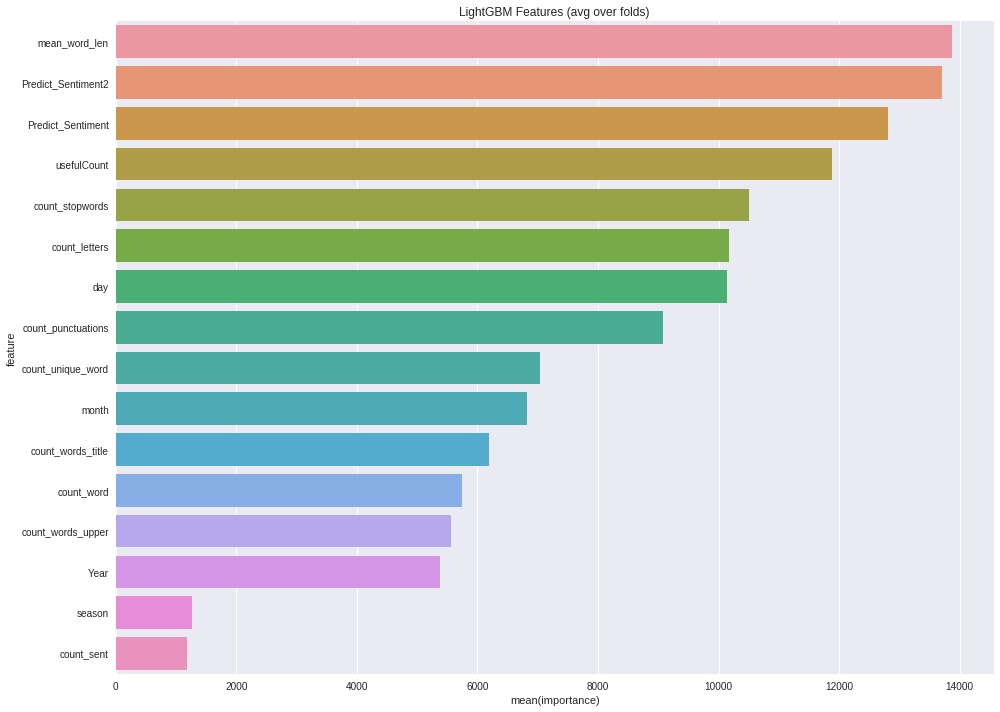

In [ ]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending = False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data = best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [ ]:
# Dictionary_Sentiment_Analysis
# Because the package used for prediction of 'Predict value' is formed with movie review data, it can be unsuitable for this project which analyzes reviews
# for drugs. To make up for this, we conducted additional emotional analysis using the Harvard emotional dictionary.

# import dictionary data
word_table = pd.read_csv("drive/My Drive/Projects/practice/Drugs/inquirerbasic.csv")

# checking the head of the dictionary
word_table.head(10)

,Entry,Source,Positiv,Negativ
0,A,H4Lvd,NaN,NaN
1,ABANDON,H4Lvd,NaN,Negativ
2,ABANDONMENT,H4,NaN,Negativ
3,ABATE,H4Lvd,NaN,Negativ
4,ABATEMENT,Lvd,NaN,NaN
5,ABDICATE,H4,NaN,Negativ
6,ABHOR,H4,NaN,Negativ
7,ABIDE,H4,Positiv,NaN
8,ABILITY,H4Lvd,Positiv,NaN
9,ABJECT,H4,NaN,Negativ


In [ ]:
# make list of sentiment
#Positiv word list   

temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
len(temp_Positiv)
len(Positiv_word_list) 

1637

In [ ]:
#Negativ word list 

temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
len(temp_Negativ)
len(Negativ_word_list)

2006

In [ ]:
##2. counting the word 98590

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = df_test['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df_test["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df_test["num_Negativ_word"] = f2.sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
# decide sentiment
df_test["Positiv_ratio"] = df_test["num_Positiv_word"]/(df_test["num_Positiv_word"]+df_test["num_Negativ_word"])
df_test["sentiment_by_dic"] = df_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

df_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,...,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,season,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic
119499,177721,Duloxetine,Depression,"""After following multiple combat tours I damag...",10,2015-02-04,52,1.0,2015,2,...,27,3,14,32,5.144578,4,NaN,NaN,NaN,0.5
119500,177965,Duloxetine,ibromyalgia,"""I was diagnosed with fibromyalgia about 1 yr ...",9,2012-08-19,35,1.0,2012,8,...,13,1,4,27,5.185185,2,NaN,NaN,NaN,0.5
119501,177989,Duloxetine,ibromyalgia,"""I tapered off it because I was feeling antsy ...",3,2012-05-23,12,0.0,2012,5,...,3,2,2,7,5.000000,1,NaN,NaN,NaN,0.5
119502,127963,Phentermine,Obesity,"""I started on phentermine 37.5 on 9/19 today i...",10,2016-09-26,11,1.0,2016,9,...,22,9,13,56,4.978723,3,NaN,NaN,NaN,0.5
119503,227307,Etonogestrel,Birth Control,"""I got this about 10 months ago. The first cou...",8,2013-09-18,4,1.0,2013,9,...,33,4,10,44,5.000000,3,NaN,NaN,NaN,0.5


In [ ]:
def userful_count(data):
    grouped = data.groupby(['use_case_for_drug']).size().reset_index(name='user_size')
    data = pd.merge(data, grouped, on='use_case_for_drug', how='left')
    return data

df_test =  userful_count(df_test) 
df_test['number_of_times_prescribed'] = df_test['number_of_times_prescribed']/df_test['user_size']

In [ ]:
df_test['deep_pred'] = sub_preds_deep
df_test['machine_pred'] = sub_preds

df_test['total_pred'] = (df_test['deep_pred'] + df_test['machine_pred'] + df_test['sentiment_by_dic'])*df_test['number_of_times_prescribed']

In [ ]:
df_test = df_test.groupby(['use_case_for_drug','name_of_drug']).agg({'total_pred' : ['mean']})
df_test

total_pred
                                                          mean
condition           drugName                                  
ADHD                Adderall                          0.099140
                    Adderall XR                       0.063583
                    Adzenys XR-ODT                    0.017944
                    Amphetamine                       0.023603
                    Amphetamine / dextroamphetamine   0.085227
                    Armodafinil                       0.010174
                    Atomoxetine                       0.084078
                    Bupropion                         0.268210
                    Catapres                          0.158895
                    Clonidine                         0.242938
                    Concerta                          0.094004
                    Cylert                            0.030266
                    Daytrana                          0.066724
                    Desoxyn                           0.189944
                    Desvenlafaxine                    0.045373
                    Dexedrine                         0.105711
                    Dexmethylphenidate                0.071387
                    Dextroamphetamine                 0.083171
                    Dyanavel XR                       0.004621
                    Evekeo                            0.029930
                    Focalin                           0.089385
                    Focalin XR                        0.090817
                    Guanfacine                        0.119257
                    Intuniv                           0.169424
                    Lisdexamfetamine                  0.068864
                    Metadate CD                       0.051284
                    Methamphetamine                   0.077435
                    Methylin                          0.039728
                    Methylin ER                       0.057098
                    Methylphenidate                   0.078681
...                                                        ...
ibromyalgia         Mobic                             0.267318
                    Mucinex                           0.517463
                    Nabilone                          0.299179
                    Naltrexone                        0.334619
                    Neurontin                         0.185521
                    Nuvigil                           0.426937
                    Prednisone                        0.155591
                    Pregabalin                        0.273967
                    Pristiq                           0.089227
                    Savella                           0.182845
                    Skelaxin                          0.213353
                    Topamax                           0.371524
                    Topiramate                        0.133210
                    Tramadol                          0.231003
                    Trazodone                         0.100284
                    Ultram                            0.129291
                    Ultram ER                         0.178105
                    Venlafaxine                       0.135673
                    Xyrem                             0.202750
lic Acid Deficiency Deplin                           19.552218
me                  Bevacizumab                       6.666041
min)                Empagliflozin / metformin         1.314719
                    Metformin                        13.834253
moterol)            Arformoterol                      2.600963
                    Budesonide / formoterol           3.345123
                    Formoterol                        0.000000
zen Shoulde         Nabumetone                       16.816187
                    Naproxen                          3.999625
                    Relafen                          22.220137
                    Voltaren                         16.500000

[4673 rows x 1 colu